<a href="https://colab.research.google.com/github/JorgeLGomes/PROJETA/blob/main/Projeta_API_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

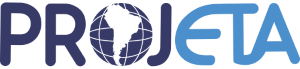
###**<font color=darkblue>PROJEÇÕES DE MUDANÇA DO CLIMA PARA A AMÉRICA DO SUL REGIONALIZADAS PELO MODELO ETA**

# <font color=red>**INFORMAÇÕES**


*   **Como Rodar**
       <p align="justify">O simbolo de play (▶), no canto superior esquerdo de cada célula, executa o cógigo contido na mesma.
       Sempre que carregar o código no google colab, deve ser executado as três células do código na sequência, **Carregamento das Bibliotecas**, **Definição das Funções** e **Seleção de Dados**:<p>
       Clicar no simbolo destacado em vermelho.       

       **<font color=black>Carregamento das Bibliotecas**<font color=black>
       
       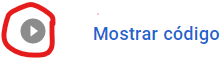
       
       **<font color=black>Definição das Funções**<font color=black>
       
       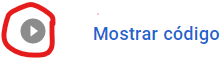

       **<font color=black>Seleção dos Dados** <font color=black>
       
       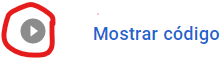

    Caso queira executar todas as célular utilize a combinação de teclas *CTRL+F9*. Ao finalizar a execução de todas as células, uma consulta terá sido feita no banco de dados e um gráfico, do dado adquirido, será plotado no final da página. Essa ação somente irá gerar o gráfico da informação, nenhum dado será salvo. Para que as informações sejam salvas no disco, devem ser habilitadas as opções:

    Salva_CSV, para salvar os dados no formato csv 

    Salva_Grafico, para salvar o gráfico no formato png 
    
    <p align="justify">Após a primeira execução, enquanto o google colab não for desconectado, não será preciso executar as duas primeiras células (**<font color=green>Carregamento das Bibliotecas, Definição das Funções** <font color=black>). Ao fazer Uma nova seleção, basta executar o  play (▶) para uma nova consulta ao banco. (OBS: foi definido para que a célula **<font color=green>Seleção dos Dados** <font color=black> seja executada automáticamente após uma seleção, caso não ocorra, basta clicar no play)<p>
*   **Opções**
    *   *Rodada_selecionada:*
        
        Seleção da rodada/cenário
    *   *Frequencia_temporal:*
    
        Frequencia temporal de obtenção dos dados. As requisições ficam mais demoradas com o aumento da frequência 
    *   *model_var:*
        
        Variáveis disponibilizadas
    *   *Latitude:*
        
        Campo para a seleção da latitude do ponto desejado. 
        
        A disponibilização dos dados é dependente da rodada, segue abaixo o range onde os dados estão disponíveis
        *   continental: range disponível entre 50S a 27N
        *   sudeste-BR:  range disponível entre 26S a 18S
    *   *Longitude:*
        
        Campo para a seleção da longitude do ponto desejado. 
        
        A disponibilização dos dados é dependente da rodada, segue abaixo o range onde os dados estão disponíveis
        *   continental: range disponível entre 99W a 32W
        *   sudeste-BR:  range disponível entre 50W a 41W
    *   Salva_CSV: 
    
        habilita o código a salvar a informação adquirida no banco no formato csv
    *   Plota_Grafico: 
    
        habilita o código a plotar a informação adquirida em um gráfico de linhas
    *   Salva_Grafico: 
    
        habilita o código a salvar a o gráfico em formato png. Essa ação só será efetiva se a opção Plota_Gráfico estiver selecionada

#<font color=red>**Dicas**
*   <p align="justify">Caso as seleções Salva_CSV e Salva_Grafico estiverm selecionadas, uma dica é desabilitar, nas configurações do navegador, a opção de "Perguntar onde salvar cada arquivo antes de fazer download", com isso, a cada seleção, os arquivos serão salvos automaticamente.<p>

*   Para informações sobre o google colab: 
https://research.google.com/colaboratory/intl/pt-BR/faq.html

**Dúvidas** enviar email para projeta@inpe.br

In [ ]:
#@title Carregamento das Bibliotecas { run: "auto" }
from ipywidgets import interact, Layout
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output
import scipy as sci
import datetime
import json
import requests
import csv
from google.colab import files
import altair as alt

In [ ]:
#@title Definição das Funções { run: "auto" }
def set_param_cenario(Rodada_selecionada):
  global model, resol, Cenario, Dominio, ModDrive,yyyymmdd_i,yyyymmdd_f
  global lat_min,lat_max,lon_min,lon_max,step
  if Rodada_selecionada == '20km, RCP4.5, continental, MIROC5': 
    model="1"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP4.5"
    Dominio="continental"
    ModDrive="MIROC5"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32
    step=0.01
  elif Rodada_selecionada == '20km, RCP8.5, continental, MIROC5':
    model="2" 
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP8.5"
    Dominio="continental"
    ModDrive="MIROC5"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, Historico, continental, MIROC5':
    model="15" 
    yyyymmdd_i="1961-01-01"
    yyyymmdd_f="2005-12-31"
    resol="20km"
    Cenario="Historico"
    Dominio="continental"
    ModDrive="MIROC5"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '05km, RCP4.5, sudeste-BR, HADGEM2-ES':
    model="22"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="05km"
    Cenario="RCP4.5"
    Dominio="sudeste-BR"
    ModDrive="HADGEM2-ES"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '05km, RCP8.5, sudeste-BR, HADGEM2-ES':
    model="23"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="05km"
    Cenario="RCP8.5"
    Dominio="sudeste-BR"
    ModDrive="HADGEM2-ES"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '05km, Historico, sudeste-BR, HADGEM2-ES':
    model="21"
    yyyymmdd_i="1961-01-01"
    yyyymmdd_f="2005-12-31"
    resol="05km"
    Cenario="Historico"
    Dominio="sudeste-BR"
    ModDrive="HADGEM2-ES"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=32

  elif Rodada_selecionada == '20km, RCP4.5, continental, HADGEM2-ES':
    model="3"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP4.5"
    Dominio="continental"
    ModDrive="HADGEM2-ES"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, RCP8.5, continental, HADGEM2-ES':
    model="5"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP8.5"
    Dominio="continental"
    ModDrive="HADGEM2-ES"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, Historico, continental, HADGEM2-ES':
    model="14"
    yyyymmdd_i="1961-01-01"
    yyyymmdd_f="2005-12-31"
    resol="20km"
    Cenario="Historico"
    Dominio="continental"
    ModDrive="HADGEM2-ES"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=32   

  elif Rodada_selecionada == '20km, RCP4.5, continental, CANESM2':
    model="7"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP4.5"
    Dominio="continental"
    ModDrive="CANESM2"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, RCP8.5, continental, CANESM2':
    model="8"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP8.5"
    Dominio="continental"
    ModDrive="CANESM2"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, Historico, continental, CANESM2':
    model="13"
    yyyymmdd_i="1961-01-01"
    yyyymmdd_f="2005-12-31"
    resol="20km"
    Cenario="Historico"
    Dominio="continental"
    ModDrive="CANESM2"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=32       

  elif Rodada_selecionada == '20km, RCP4.5, continental, BESM':
    model="20"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP4.5"
    Dominio="continental"
    ModDrive="BESM"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, RCP8.5, continental, BESM':
    model="19"
    yyyymmdd_i="2006-01-01"
    yyyymmdd_f="2099-12-31"
    resol="20km"
    Cenario="RCP8.5"
    Dominio="continental"
    ModDrive="BESM"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=-32

  elif Rodada_selecionada == '20km, Historico, continental, BESM':
    model="17"
    yyyymmdd_i="1961-01-01"
    yyyymmdd_f="2005-12-31"
    resol="20km"
    Cenario="Historico"
    Dominio="continental"
    ModDrive="BESM"
    lat_min=-49
    lat_max=26
    lon_min=-99
    lon_max=32       
  return
  
def set_param_freq(Frequencia_temporal):
  global model_freq, freq_idx
  if Frequencia_temporal == 'ANUAL': 
    model_freq="YEARLY"
    freq_idx="4"
  elif Frequencia_temporal == 'MENSAL':
    model_freq="MONTHLY" 
    freq_idx="3"
  elif Frequencia_temporal == 'DIARIA':
    model_freq="DAILY" 
    freq_idx="2"
  #elif Frequencia_temporal == '3 HORAS':
  #  model_freq="HOURLY"
  #  freq_idx="1"
  return
def set_variavel(model_var):
  global yfig_title
  if model_var == 'PREC':
    yfig_title="Precipitação (mm)"
  elif model_var == 'TP2M':
    yfig_title="Temperatura 2m (C)"
  elif model_var == 'CAPE':
    yfig_title="Energia Potencial Disponível para Convecção (J/kg)"
  elif model_var == 'EVTP':
    yfig_title="Evaporação (mm)"
  elif model_var == 'CLSF':
    yfig_title="Fluxo de Calor Latente à Superfície (W/m2)"
  elif model_var == 'GHFL':
    yfig_title="Fluxo de Calor no Solo (W/m2)"
  elif model_var == 'CSSF':
    yfig_title="Fluxo de Calor Sensível à Superfície (W/m2)"
  elif model_var == 'HINV':
    yfig_title="Cobertura de Nuvens Altas (0-1)"
  elif model_var == 'LWNV':
    yfig_title="Cobertura de Nuvens Baixas (0-1)"
  elif model_var == 'MDNV':
    yfig_title="Cobertura de Nuvens Médias (0-1)"
  elif model_var == 'NEVE':
    yfig_title="Neve (mm)"
  elif model_var == 'PSLC':
    yfig_title="Pressão à Superfície (hPa)"
  elif model_var == 'PSLM':
    yfig_title="Pressão ao Nível Médio do Mar (hPa)"
  elif model_var == 'OCIS':
    yfig_title="Radiação de Onda Curta Incidente à Sup. (W/m2)"
  elif model_var == 'OCES':
    yfig_title="Radiação de Onda Curta Emergente à Sup. (W/m2)"
  elif model_var == 'OLES':
    yfig_title="- Radiação de Onda Curta Emergente à Sup. (W/m2)"
  elif model_var == 'OLIS':
    yfig_title="Radiação de Onda Longa Incidente à Sup. (W/m)"
  elif model_var == 'RNOF':
    yfig_title="- Escoamento Superficial (mm)"
  elif model_var == 'DP2M':
    yfig_title="Temperatura do Ponto de Orvalho a 2m (C)"
  elif model_var == 'TGSC':
    yfig_title="Temperatura do Solo na Camada de 0-10 cm (C)"
  elif model_var == 'TGRZ':
    yfig_title="Temperatura do Solo na Camada de 10-40 cm (C)"
  elif model_var == 'MXTP':
    yfig_title="Temperatura Máxima do ar a 2m (C)"
  elif model_var == 'MNTP':
    yfig_title="Temperatura Mínima do ar a 2m (C)"
  elif model_var == 'TSFC':
    yfig_title="Temperatura Superficial (skin) (C)"
  elif model_var == 'USSL':
    yfig_title="Umidade do Solo na Camada de 0-10 cm (0-1)"
  elif model_var == 'UZRS':
    yfig_title="Umidade do Solo na Camada de 10-40 cm (0-1)"
  elif model_var == 'UR2M':
    yfig_title="Umidade Relativa do ar a 2m (%)"
  elif model_var == 'D10M':
    yfig_title="Direção do Vento a 10m (graus meteorológico)"
  elif model_var == 'D100':
    yfig_title="Direção do Vento a 100m (graus meteorológico)"
  elif model_var == 'CDD':
    yfig_title="CDD (dias)"
  elif model_var == 'CSDI':
    yfig_title="CSDI (dias)"
  elif model_var == 'CWD':
    yfig_title="CWD (dias)"
  elif model_var == 'DTR':
    yfig_title="DTR (C)"
  elif model_var == 'FD':
    yfig_title="FD (dias)"
  elif model_var == 'ID':
    yfig_title="ID (dias)"
  elif model_var == 'PRCPTOT':
    yfig_title="PRCPTOT (mm)"
  elif model_var == 'R10mm':
    yfig_title="R10mm (dias)"
  elif model_var == 'R20mm':
    yfig_title="R20mm (dias)"
  elif model_var == 'R25mm':
    yfig_title="R25mm (dias)"
  elif model_var == 'R95p':
    yfig_title="R95p (mm)"
  elif model_var == 'R99p':
    yfig_title="R99p (mm)"
  elif model_var == 'RX1day':
    yfig_title="RX1day (mm)"
  elif model_var == 'RX5day':
    yfig_title="RX5day (mm)"
  elif model_var == 'SDII':
    yfig_title="SDII (mm)"
  elif model_var == 'SU25':
    yfig_title="SU25 (dias)"
  elif model_var == 'TN10p':
    yfig_title="TN10p (%)"
  elif model_var == 'TX90p':
    yfig_title="TX90p (%)"
  elif model_var == 'TXn':
    yfig_title="TXn (C)"
  elif model_var == 'TXx':
    yfig_title="TXx (C)"
  elif model_var == 'WSDI':
    yfig_title="WSDI (dias)"
  elif model_var == 'CDDc':
    yfig_title="CDD corrigido (dias)"
  elif model_var == 'CSDIc':
    yfig_title="CSDI corrigido (dias)"
  elif model_var == 'CWDc':
    yfig_title="CWD corrigido (dias)"
  elif model_var == 'DTRc':
    yfig_title="DTR corrigido (C)"
  elif model_var == 'FDc':
    yfig_title="FD corrigido (dias)"
  elif model_var == 'IDc':
    yfig_title="ID corrigido (dias)"
  elif model_var == 'PRCPTOTc':
    yfig_title="PRCPTOT corrigido (mm)"
  elif model_var == 'R10mmc':
    yfig_title="R10mm corrigido (dias)"
  elif model_var == 'R20mmc':
    yfig_title="R20mm corrigido (dias)"
  elif model_var == 'R25mmc':
    yfig_title="R25mm corrigido (dias)"
  elif model_var == 'R95pc':
    yfig_title="R95p corrigido (mm)"
  elif model_var == 'R99pc':
    yfig_title="R99p corrigido (mm)"
  elif model_var == 'RX1dayc':
    yfig_title="RX1day corrigido (mm)"
  elif model_var == 'RX5dayc':
    yfig_title="RX5day corrigido (mm)"
  elif model_var == 'SDIIc':
    yfig_title="SDII corrigido (mm)"
  elif model_var == 'SU25c':
    yfig_title="SU25 corrigido (dias)"
  elif model_var == 'TN10pc':
    yfig_title="TN90p corrigido (%)"
  elif model_var == 'TN90pc':
    yfig_title="TN90p corrigido (%)"
  elif model_var == 'TNnc':
    yfig_title="TNn corrigido (C)"
  elif model_var == 'TNxc':
    yfig_title="TNx corrigido (C)"
  elif model_var == 'TRc':
    yfig_title="TR corrigido (dias)"
  elif model_var == 'TX10pc':
    yfig_title="TX10p corrigido (%)"
  elif model_var == 'TX90pc':
    yfig_title="TX90p corrigido (%)"
  elif model_var == 'TXnc':
    yfig_title="TXn corrigido (C)"
  elif model_var == 'TXxc':
    yfig_title="TXx corrigido (C)"
  elif model_var == 'WSDIc':
    yfig_title="WSDI corrigido (dias)"
  elif model_var == 'PSnc':
    yfig_title="PSn corrigido (hPa)"
  elif model_var == 'PSxc':
    yfig_title="PSx corrigido (hPa)"
  elif model_var == 'PS10pc':
    yfig_title="PS10p corrigido (%)"
  elif model_var == 'PS90pc':
    yfig_title="PS90p corrigido (%)"
  elif model_var == 'OCnc':
    yfig_title="OCn corrigido (W/m2)"
  elif model_var == 'OC10pc':
    yfig_title="OC10p corrigido (%)"
  elif model_var == 'WXnc':
    yfig_title="WXn corrigido (m/s)"
  elif model_var == 'WXxc':
    yfig_title="WXx corrigido (m/s)"
  elif model_var == 'WX10pc':
    yfig_title="WX10p corrigido (%)"
  elif model_var == 'WX90pc':
    yfig_title="WX90p corrigido (%)"

def Write_CSV():
    df.to_csv(file_out+'.csv',sep=';',index=False)
    files.download(file_out+'.csv')
    return

def Gera_URL():
    global url,file_out
    url="https://projeta.cptec.inpe.br/api/v1/public/ETA/"+model+"/"
    url=url+model_freq+"/"+freq_idx+"/"+datei[1]+"/"+datei[0]
    url=url+"/"+datef[1]+"/"+datef[0]+"/"+model_var+"/"+str(Latitude)+"/"+str(Longitude)+"/"
    file_out="Eta"+resol+"_"+Cenario+"_"+Dominio+"_"+ModDrive+"_"+model_freq+"_"+datei[0]+"-"+datei[1]+"_"+datef[0]+"-"+datef[1]+"_"+model_var+"_"+str(Latitude)+"_"+str(Longitude)
    return
def Get_Data():
    global df
    request = requests.get(url)
    request_json = request.json()
    df = pd.json_normalize(request_json)
    return 
def on_button_clicked_save_fig(b):
    plt.savefig(file_out+'.png')
    files.download(file_out+'.png')
    return
def Save_Fig():
    button = widgets.Button(description="Save Fig")
    display(button)
    button.on_click(on_button_clicked_save_fig)
    return

def Plota(Salva_Grafico):
#    %matplotlib notebook
    %matplotlib inline
    Gera_URL()
    #%config InlineBackend.figure_format ='retina'
    df.plot(x ='date', y='value', kind='line')
    plt.title(file_out, size = 10)
    plt.xlabel("Data")
    plt.ylabel(yfig_title)
    if Salva_Grafico:
      plt.savefig(file_out+'.png')
      files.download(file_out+'.png')
    plt.show()
    return

https://projeta.cptec.inpe.br/api/v1/public/ETA/2/YEARLY/4/01/2006/12/2099/PREC/-2.24/-64.11/


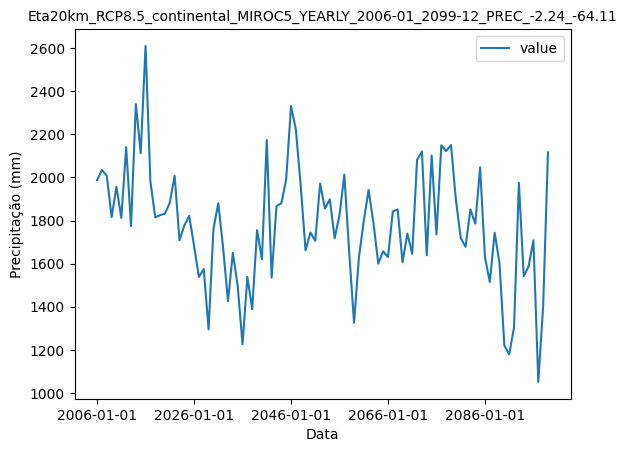

In [ ]:
#@title  { run: "auto", display-mode: "form" }
#@title  { run: "auto" }
#@title  { form-width: "50%" }
#@title  { form-width: "50%", display-mode: "both" }

Rodada_selecionada = "20km, RCP8.5, continental, MIROC5" #@param ["20km, RCP4.5, continental, MIROC5", "20km, RCP8.5, continental, MIROC5", "20km, Historico, continental, MIROC5", "05km, RCP4.5, sudeste-BR, HADGEM2-ES","05km, RCP8.5, sudeste-BR, HADGEM2-ES", "05km, Historico, sudeste-BR, HADGEM2-ES","20km, RCP4.5, continental, HADGEM2-ES", "20km, RCP8.5, continental, HADGEM2-ES", "20km, Historico, continental, HADGEM2-ES", "20km, RCP4.5, continental, CANESM2", "20km, RCP8.5, continental, CANESM2", "20km, Historico, continental, CANESM2", "20km, RCP4.5, continental, BESM", "20km, RCP8.5, continental, BESM", "20km, Historico, continental, BESM" ] {allow-input: true}
set_param_cenario(Rodada_selecionada)

datei=yyyymmdd_i.split("-")
datef=yyyymmdd_f.split("-")
Frequencia_temporal = "ANUAL" #@param ["ANUAL", "MENSAL", "DIARIA"] {allow-input: true}
set_param_freq(Frequencia_temporal)

model_var = "PREC"   #@param ['PREC','TP2M', 'CAPE', 'EVTP','CLSF','GHFL','CSSF','HINV','LWNV','MDNV','NEVE','PSLC','PSLM','OCIS','OCES','OLES','OLIS','RNOF','DP2M','TGSC','TGRZ','MXTP','MNTP','TSFC','USSL','UZRS','UR2M','D10M','W10M','W100','D100','CDD','CSDI','CWD','DTR','FD','ID','PRCPTOT','R10mm','R20mm','R25mm','R95p','R99p','RX1day','RX5day','SDII','SU25','TN10p','TX90p','TXn','TXx','WSDI','CDDc','CSDIc','CWDc','DTRc','FDc','IDc','PRCPTOTc','R10mmc','R20mmc','R25mmc','R95pc','R99pc','RX1dayc','RX5dayc','SDIIc','SU25c','TN10pc','TN90pc','TNnc','TNxc','TRc','TX10pc','TX90pc','TXnc','TXxc','WSDIc','PSnc','PSxc','PS10pc','PS90pc','OCnc','OC10pc','WXnc','WXxc','WX10pc','WX90pc']{allow-input: true}

set_variavel(model_var)
Latitude = -2.24 #@param {type:"slider", min: -49, max:26, step:0.01}
Longitude = -64.11 #@param {type:"slider", min:-99, max:-32, step:0.01}
Salva_CSV = False #@param {type:"boolean"}
Plota_Grafico = True #@param {type:"boolean"}
Salva_Grafico = False #@param {type:"boolean"}

#Latitude = -25 #@param {type:"number"}
#Longitude = -50 #@param {type:"number"}


Gera_URL()
print(url)
Get_Data()
if Plota_Grafico:
  Plota(Salva_Grafico)
if Salva_CSV:
  Write_CSV()

# **URL e Gráfico do Dado Selecionado**


**DESCRIÇÃO DAS VARIÁVEIS:** http://ftp1.cptec.inpe.br/pesquisa/grpeta/petamdl/Projetos/Projeta/variaveis.pdf

**DESCRIÇÃO DOS ÍNDICES EXTREMOS:** http://ftp1.cptec.inpe.br/pesquisa/grpeta/petamdl/Projetos/Projeta/indices.pdf 

#<font color=red><p align="justify">**Quando os dados forem utilizados para trabalhos acadêmicos e publicações, utilizar nas referências bibliográficas a fonte dos dados CPTEC/INPE da seguinte forma "Dados gerados pelo CPTEC/INPE e disponibilizados na Plataforma PROJETA" e as referências bibliográficas:**</p>

<p align="justify">Chou, S.C, Lyra, A. , Mourão, C. , Dereczynski, C. , Pilotto, I. , Gomes, J. , Bustamante, J. , Tavares, P. , Silva, A. , Rodrigues, D. , Campos, D. , Chagas, D. , Sueiro, G. , Siqueira, G. , Nobre, P. and Marengo, J. (2014) Evaluation of the Eta Simulations Nested in Three Global Climate Models. American Journal of Climate Change, 3, 438-454. doi:10.4236/ajcc.2014.35039. http://www.scirp.org/journal/PaperInformation.aspx?PaperID=52887#.VakHg_lViko

Chou, S.C, Lyra, A. , Mourão, C. , Dereczynski, C. , Pilotto, I. , Gomes, J. , Bustamante, J. , Tavares, P. , Silva, A. , Rodrigues, D. , Campos, D. , Chagas, D. , Sueiro, G. , Siqueira, G. and Marengo, J. (2014) Assessment of Climate Change over South America under RCP 4.5 and 8.5 Downscaling Scenarios. American Journal of Climate Change,3, 512-527. doi: 10.4236/ajcc.2014.35043. http://www.scirp.org/journal/PaperInformation.aspx?PaperID=52877#.VakIh_lVikp

Lyra, A., Tavares, P., Chou, S.C., Sueiro, G., Dereczynski, C.P., Sondermann, M., Silva, A., Marengo, J., Giarolla, A. 2017. Climate change projections over three metropolitan regions in Southeast Brazil using the non-hydrostatic Eta regional climate model at 5-km resolution Theor Appl Climatol. doi:10.1007/s00704-017-2067-z. https://link.springer.com/article/10.1007/s00704-017-2067-z

Terceira Comunicação Nacional do Brasil à Convenção-Quadro das Nações Unidas sobre Mudança do Clima</p>

Executive Summary: http://unfccc.int/resource/docs/natc/branc3es.pdf

Volume 1: http://unfccc.int/resource/docs/natc/branc3v1.pdf

Volume 2: http://unfccc.int/resource/docs/natc/branc3v2.pdf 

Volume 3: http://unfccc.int/resource/docs/natc/branc3v3.pdf